In [1]:
# general libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from random import *
import time

# tensorflow libraries
from tensorflow.keras.datasets import fashion_mnist
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

In [2]:
import sys
sys.path.append('ADL-Book-2nd-Ed/modules/')

from style_setting import set_style

In [3]:
((trainX, trainY), (testX, testY)) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
def get_label_name(idx):
  """Returns the corresponding label's name, given its numerical value."""
  
  if (idx == 0):
      return '(0) T-shirt/top'
  elif (idx == 1):
      return '(1) Trouser'
  elif (idx == 2):
      return '(2) Pullover'
  elif (idx == 3):
      return '(3) Dress'
  elif (idx == 4):
      return '(4) Coat'
  elif (idx == 5):
      return '(5) Sandal'
  elif (idx == 6):
      return '(6) Shirt'
  elif (idx == 7):
      return '(7) Sneaker'
  elif (idx == 8):
      return '(8) Bag'
  elif (idx == 9):
      return '(9) Ankle boot'

In [5]:
def get_random_element_with_label (data, lbls, lbl):
  """Returns one numpy array (one column) with an example of a choosen label."""
  
  tmp = lbls == lbl
  subset = data[tmp.flatten(), :]
  return subset[randint(1, subset.shape[1]), :]

In [6]:
print('Dimensions of the training dataset: ', trainX.shape)
print('Dimensions of the test dataset: ', testX.shape)
print('Dimensions of the training labels: ', trainY.shape)
print('Dimensions of the test labels: ', testY.shape)

Dimensions of the training dataset:  (60000, 28, 28)
Dimensions of the test dataset:  (10000, 28, 28)
Dimensions of the training labels:  (60000,)
Dimensions of the test labels:  (10000,)


In [7]:
labels_train = np.zeros((60000, 10))
labels_train[np.arange(60000), trainY] = 1

data_train = trainX.reshape(60000, 784)

labels_test = np.zeros((10000, 10))
labels_test[np.arange(10000), testY] = 1

data_test = testX.reshape(10000, 784)

In [8]:
print('Dimensions of the training dataset: ', data_train.shape)
print('Dimensions of the test dataset: ', data_test.shape)
print('Dimensions of the training labels: ', labels_train.shape)
print('Dimensions of the test labels: ', labels_test.shape)

Dimensions of the training dataset:  (60000, 784)
Dimensions of the test dataset:  (10000, 784)
Dimensions of the training labels:  (60000, 10)
Dimensions of the test labels:  (10000, 10)


In [12]:
data_train_norm = np.array(data_train/255.0)
data_test_norm = np.array(data_test/255.0)

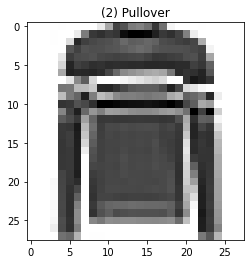

In [13]:
idx = 5
plt.imshow(data_train_norm[idx, :].reshape(28, 28), cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis("on")
plt.title(get_label_name(trainY[idx]))
plt.show()

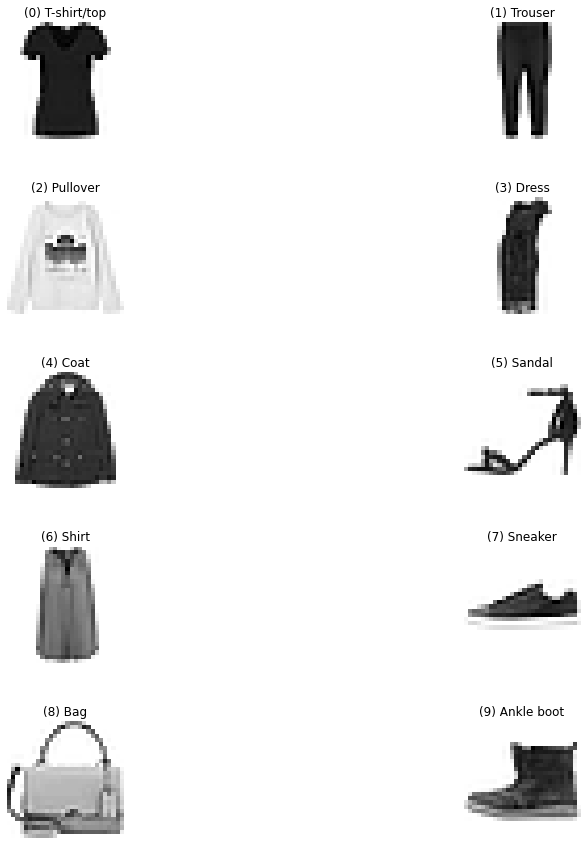

In [18]:
# The following code create a numpy array where in column 0 you will find 
# an example of label 0, in column 1 of label 1 and so on.
labels_overview = np.empty([784, 10])
for i in range (0, 10):
    col = get_random_element_with_label(data_train_norm, trainY, i)
    labels_overview[:,i] = col
    
f = plt.figure(figsize = (15, 15))
count = 1
for i in range(0, 10):
    plt.subplot(5, 2, count)
    count = count + 1
    plt.subplots_adjust(hspace = 0.5)
    plt.title(get_label_name(i))
    some_digit_image = labels_overview[:, i].reshape(28, 28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation = "nearest")
    plt.axis("off")
    #pass #<-- was in original code, I don't think it's necessary?

In [22]:
# build the model
def build_model(opt):
  # create model
    model = keras.Sequential()
    model.add(layers.Dense(15, input_dim = 784, activation = 'relu')) # add first hidden layer and set input dimensions
    model.add(layers.Dense(10, activation = 'softmax')) # add output layer
    # compile model
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['categorical_accuracy'])
    return model

In [23]:
#build and summarize model
model = build_model(tf.keras.optimizers.SGD(momentum = 0.0, learning_rate = 0.01))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 15)                11775     
                                                                 
 dense_1 (Dense)             (None, 10)                160       
                                                                 
Total params: 11,935
Trainable params: 11,935
Non-trainable params: 0
_________________________________________________________________


In [24]:
EPOCHS = 1000

history = model.fit(
  data_train_norm, labels_train,
  epochs = EPOCHS, verbose = 0,
  batch_size = data_train_norm.shape[0],
  callbacks = [tfdocs.modeling.EpochDots()])


Epoch: 0, categorical_accuracy:0.0977,  loss:2.4112,  
....................................................................................................
Epoch: 100, categorical_accuracy:0.4491,  loss:1.7171,  
....................................................................................................
Epoch: 200, categorical_accuracy:0.5845,  loss:1.3484,  
....................................................................................................
Epoch: 300, categorical_accuracy:0.6420,  loss:1.1177,  
....................................................................................................
Epoch: 400, categorical_accuracy:0.6750,  loss:0.9881,  
....................................................................................................
Epoch: 500, categorical_accuracy:0.6965,  loss:0.9090,  
....................................................................................................
Epoch: 600, categorical_accuracy:0.7151,  loss:0.8538

In [25]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,categorical_accuracy,epoch
995,0.728369,0.760133,995
996,0.728151,0.760200,996
997,0.727933,0.760333,997
998,0.727715,0.760317,998
999,0.727498,0.760433,999


In [26]:
test_loss, test_accuracy = model.evaluate(data_test_norm, labels_test, verbose = 0)
print('The accuracy on the test set is equal to: ', int(test_accuracy*100), '%.')

The accuracy on the test set is equal to:  74 %.


In [27]:
def model_nlayers(num_neurons, num_layers):
    # build model
    inputs = keras.Input(shape = 784) # input layer
    # first hidden layer
    dense = layers.Dense(num_neurons, activation = 'relu')(inputs)
    # customized number of layers and neurons per layer
    for i in range(num_layers - 1):       
        dense = layers.Dense(num_neurons, activation = 'relu')(dense)
    # output layer   
    outputs = layers.Dense(10, activation = 'softmax')(dense)
    model = keras.Model(inputs = inputs, outputs = outputs, name = 'model')
    # set optimizer and loss
    opt = tf.keras.optimizers.SGD(momentum = 0.9, learning_rate = 0.0001)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['categorical_accuracy'])
    
    # train model
    history = model.fit(
      data_train_norm, labels_train,
      epochs = 200, verbose = 0,
      batch_size = 50,
      callbacks = [tfdocs.modeling.EpochDots()])
    # save performances
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch 

    return hist, model

In [ ]:
res_10_1, model_10_1 = model_nlayers(10, 1)
res_10_2, model_10_2 = model_nlayers(10, 2)
res_10_3, model_10_3 = model_nlayers(10, 3)
res_10_4, model_10_4 = model_nlayers(10, 4)
res_100_4, model_100_4 = model_nlayers(100, 4)


Epoch: 0, categorical_accuracy:0.2338,  loss:2.0607,  
....................................................................................................
Epoch: 100, categorical_accuracy:0.8500,  loss:0.4352,  
....................................................................................................
Epoch: 0, categorical_accuracy:0.2839,  loss:1.9806,  
....................................................................................................
Epoch: 100, categorical_accuracy:0.8483,  loss:0.4403,  
....................................................................................................
Epoch: 0, categorical_accuracy:0.2450,  loss:2.1190,  
....................................................................................................
Epoch: 100, categorical_accuracy:0.8512,  loss:0.4325,  
....................................................................................................
Epoch: 0, categorical_accuracy:0.1702,  loss:2.2854,  
..